In [28]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [29]:
import pandas as pd
from classifier.single_label_classifier import SingleLabelClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve, average_precision_score
from preprocessing.features import BASELINE_FEATURE_COLUMNS
from preprocessing.preprocessor import Preprocessor
from preprocessing.tags import Tags
from evaluation.utils import create_confusion_matrix, create_classification_report, create_precision_recall_graph, create_receiver_operation_characteristic_graph, create_error_matrix_graph, create_feature_importance_graph, false_positives, false_negatives, create_revision_link_html, create_revisions_by_tag_graph

## Preprocess dataset

In [30]:
features = '../data/features-total-80c4772.csv'
tag_df = pd.read_csv('../data/tag.csv')
all_tags = [
    Tags.BLANKING,
    Tags.NONSENSE,
    Tags.QUALITY_ISSUE,
    Tags.PERSONAL_STORY,
    Tags.FALSE_FACT,
    Tags.SYNTAX,
    Tags.MERGE_CONFLICT,
    Tags.TEMPLATE,
    Tags.EDIT_WARS,
    Tags.SEO,
    Tags.INTENTION
]

preprocessor = Preprocessor(features, all_tags, BASELINE_FEATURE_COLUMNS, vandalism_sample_rate=0.4)
output = preprocessor.run()
clf = SingleLabelClassifier(output, 300)

## Evaluate classifier on undersampled trainings set¶

In [31]:
clf.train_cross_validate()

{'fit_time': array([4.09670615, 4.03059006, 4.97734499, 4.59799004, 2.16871905,
        2.44502592, 3.59980798, 3.57121515, 2.93739796, 2.82715201]),
 'score_time': array([1.05689478, 1.06114793, 1.04254699, 0.94878697, 1.05514193,
        0.9540019 , 0.86132216, 0.97022891, 0.92910123, 0.83323193]),
 'test_f1': array([0.75862069, 0.76576577, 0.72463768, 0.73831776, 0.69651741,
        0.7239819 , 0.71493213, 0.68807339, 0.74439462, 0.78504673]),
 'test_precision': array([0.83695652, 0.76576577, 0.78125   , 0.76699029, 0.76923077,
        0.72072072, 0.71171171, 0.69444444, 0.73451327, 0.80769231]),
 'test_recall': array([0.69369369, 0.76576577, 0.67567568, 0.71171171, 0.63636364,
        0.72727273, 0.71818182, 0.68181818, 0.75454545, 0.76363636]),
 'test_roc_auc': array([0.87417237, 0.87585477, 0.86339954, 0.87696733, 0.85564074,
        0.87763085, 0.83779614, 0.85716253, 0.86961433, 0.90165289]),
 'test_accuracy': array([0.82310469, 0.81227437, 0.79422383, 0.79783394, 0.77898551,
 

In [32]:
y_train_predict, y_train_predict_proba = clf.train_predict()
y_train = output.y_train

In [33]:
# Evaluate model parameters: Confusion matrix
create_confusion_matrix(y_train, y_train_predict)

,Predicted No Vandalism,Predicted Vandalism
True No Vandalism,1402,253
True Vandalism,317,787


In [34]:
# Evaluate model parameters: Classification report
print(create_classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

No Vandalism       0.82      0.85      0.83      1655
   Vandalism       0.76      0.71      0.73      1104

 avg / total       0.79      0.79      0.79      2759



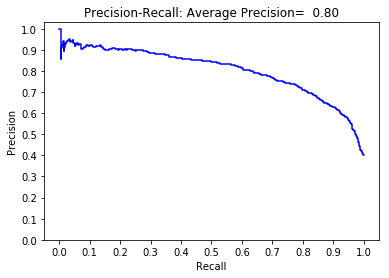

PR-AUC 0.804602988545008


In [35]:
plt, pr_auc = create_precision_recall_graph(y_train, y_train_predict_proba[:,1])
plt.show()
print("PR-AUC", pr_auc)

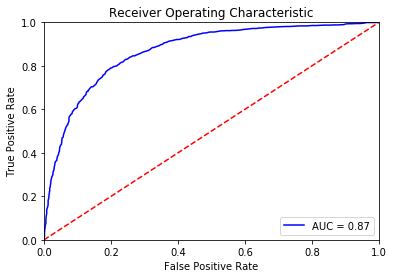

ROC-AUC 0.8689130982092036


In [36]:
plt, roc_auc = create_receiver_operation_characteristic_graph(y_train, y_train_predict_proba[:,1])
plt.show()
print("ROC-AUC", roc_auc)

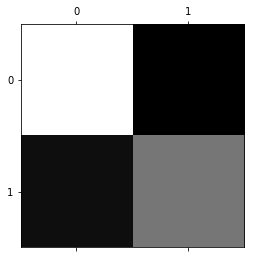

In [37]:
plt = create_error_matrix_graph(y_train, y_train_predict)
plt.show()

## Evaluate classifier on non-undersampled test set

In [38]:
y_predict, y_predict_proba = clf.test_predict()
y = output.y_test

In [39]:
# Evaluate model parameters: Confusion matrix
create_confusion_matrix(y, y_predict)

,Predicted No Vandalism,Predicted Vandalism
True No Vandalism,723,141
True Vandalism,111,267


In [40]:
# Evaluate model parameters: Classification report
print(create_classification_report(y, y_predict))

              precision    recall  f1-score   support

No Vandalism       0.87      0.84      0.85       864
   Vandalism       0.65      0.71      0.68       378

 avg / total       0.80      0.80      0.80      1242



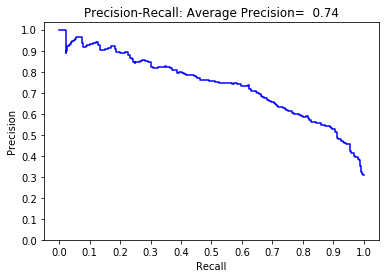

PR-AUC 0.7387336133688018


In [41]:
plt, pr_auc = create_precision_recall_graph(y, y_predict_proba[:,1])
plt.show()
print("PR-AUC", pr_auc)

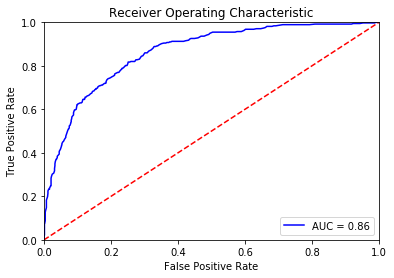

ROC-AUC 0.8620786792083089


In [42]:
plt, roc_auc = create_receiver_operation_characteristic_graph(y, y_predict_proba[:,1])
plt.show()
print("ROC-AUC", roc_auc)

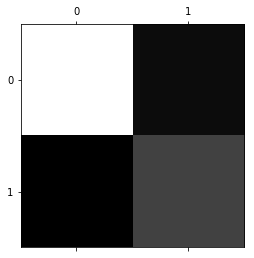

In [43]:
plt = create_error_matrix_graph(y, y_predict)
plt.show()

In [44]:
# False positives
fp = false_positives(output.X_test_with_meta, y, y_predict)
create_revision_link_html(fp, tag_df, 10)

HTML(value='<ul><li>constructive: <a href="http://en.wikipedia.org/index.php?diff=271944375">271944375 </a></l…

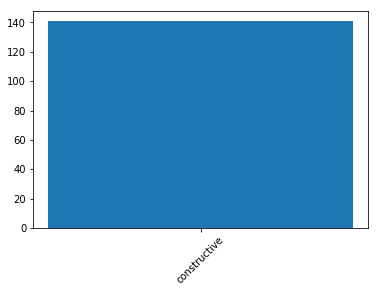

In [45]:
plt = create_revisions_by_tag_graph(fp, tag_df)
plt.show()

In [46]:
# False negatives
fn = false_negatives(output.X_test_with_meta, y, y_predict)
create_revision_link_html(fn, tag_df, 10)

HTML(value='<ul><li>EditWars: <a href="http://en.wikipedia.org/index.php?diff=587482458">587482458 </a></li><l…

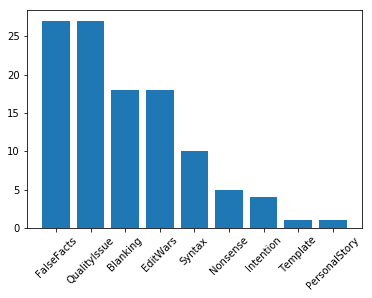

In [47]:
plt = create_revisions_by_tag_graph(fn, tag_df)
plt.show()

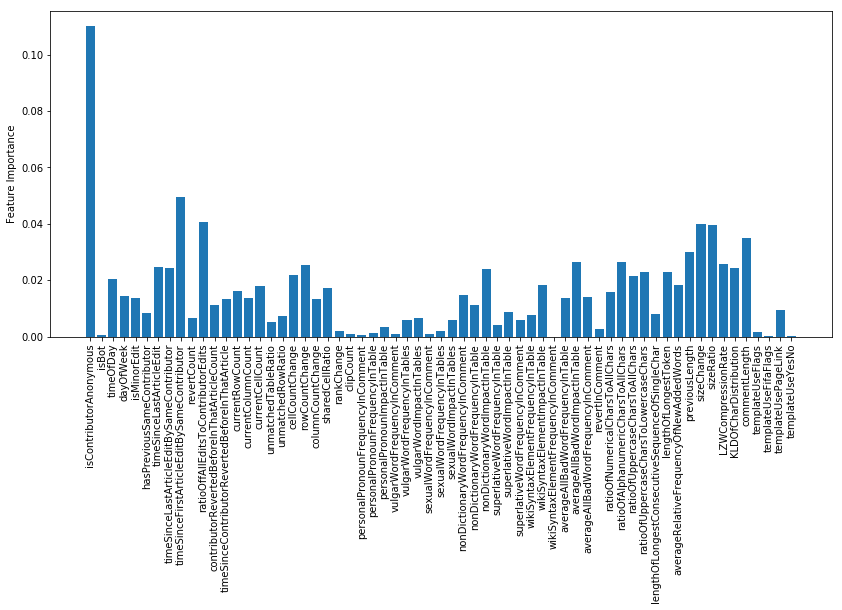

In [48]:
plt = create_feature_importance_graph(clf, output.labels)
plt.show()